In [ ]:
import numpy as np
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
bad_frames = '/content/drive/MyDrive/1000 pics/noisy images'

In [ ]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(100,100))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

  0%|          | 0/2429 [00:00<?, ?it/s]

In [ ]:
print(noisy_frames.shape)

(2429, 100, 100, 3)


In [ ]:
good_frames = '/content/drive/MyDrive/1000 pics/clean images'

In [ ]:
clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames + '/' + file, target_size=(100,100))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)

clean_frames = np.array(clean_frames)

  0%|          | 0/2429 [00:00<?, ?it/s]

In [ ]:
print(clean_frames.shape)

(2429, 100, 100, 3)


In [ ]:
round(len(noisy_frames)*0.8)

1943

In [ ]:
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

In [ ]:
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (100,100,3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      18464     
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 16)      4624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 16)      6

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(noisy_train, clean_train, epochs=50, validation_split=0.1)

Epoch 1/50
55/55 [==============================] - 299s 5s/step - loss: 0.5101 - val_loss: 0.6678
Epoch 2/50
55/55 [==============================] - 297s 5s/step - loss: 0.4896 - val_loss: 0.6525
Epoch 3/50
55/55 [==============================] - 299s 5s/step - loss: 0.4869 - val_loss: 0.6324
Epoch 4/50
55/55 [==============================] - 299s 5s/step - loss: 0.4854 - val_loss: 0.6113
Epoch 5/50
55/55 [==============================] - 298s 5s/step - loss: 0.4842 - val_loss: 0.5871
Epoch 6/50
55/55 [==============================] - 300s 5s/step - loss: 0.4851 - val_loss: 0.5570
Epoch 7/50
55/55 [==============================] - 299s 5s/step - loss: 0.4820 - val_loss: 0.5126
Epoch 8/50
55/55 [==============================] - 297s 5s/step - loss: 0.4821 - val_loss: 0.4935
Epoch 9/50
55/55 [==============================] - 297s 5s/step - loss: 0.4817 - val_loss: 0.4902
Epoch 10/50
55/55 [==============================] - 297s 5s/step - loss: 0.4814 - val_loss: 0.4859
Epoch 11/

In [ ]:
print('Final training loss \t', history.history['loss'][-1])

print('Final Validation loss \t', history.history['val_loss'][-1])


Final training loss 	 0.476909875869751
Final Validation loss 	 0.4754408597946167


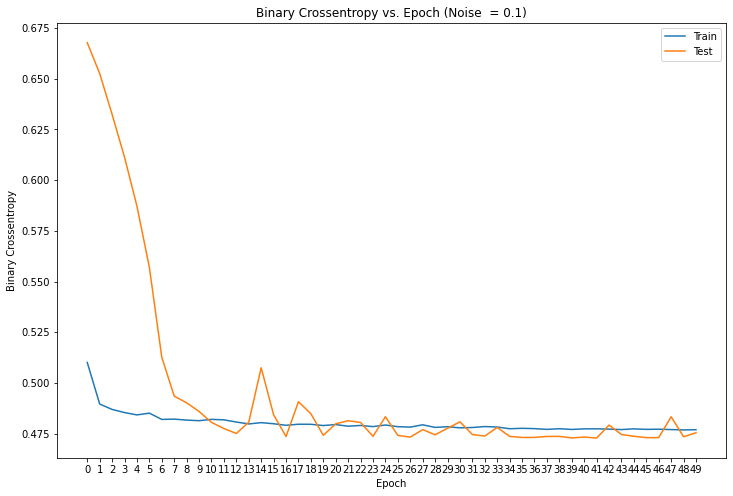

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.title('Binary Crossentropy vs. Epoch (Noise  = 0.1)')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

In [ ]:
results = autoencoder.predict(noisy_test)

In [ ]:
image = np.random.randint(0, len(noisy_test))

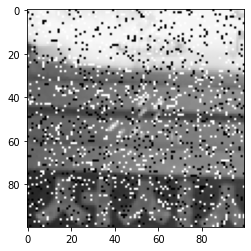

In [ ]:
plt.imshow(noisy_test[image])
plt.show()

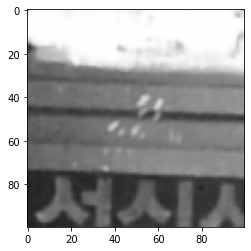

In [ ]:
plt.imshow(results[image])
plt.show()

This is the model result


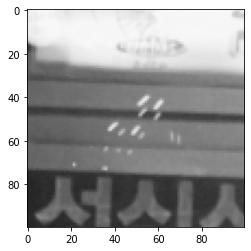

In [ ]:
plt.imshow(clean_test[image])
plt.show()

This is the ground reality

In [ ]:
tf.keras.callbacks.ModelCheckpoint

tensorflow.python.keras.callbacks.ModelCheckpoint